### Function definitions

###### Reads .eig file eigName

- returns the list of complex eigenvalues sorted according to their absolute values `evs.sort(key = abs)`
- CDF means Complex Double Field

In [1]:
def eigRead(eigName):
    f = open(eigName, "r")
    evs = []
    for line in f:
        s = line.split()
        evs.append(CDF(float(s[0]), float(s[1])))
    f.close()
    evs.sort(key = abs)
    return evs

###### Plots the list of complex eigenvalues in complex plane

In [2]:
def eigPlot(evs):
    return list_plot([[ev.real(), ev.imag()] for ev in evs],
        aspect_ratio = 1)

###### Counts the number of zero modes
- eigenvalues with absolute value smaller than $10^{-12}$ are assumed to be zero modes

In [3]:
def countZeros(evs):
    return len([ev for ev in evs if abs(ev) < 1e-12 ])

##### Prints zero modes and maximal errors
- maximal error is the maximal deviation of complex conjugate pairs (separately for real and for imaginary part)
- after the maximal deviation its position in the list (list index) is written

In [4]:
def errors(evs):
    nz = countZeros(evs)
    # for i in range(nz): print(i + 1, evs[i])
    evp = evs[nz:len(evs) - nz]
    errR = [abs(evp[2 * i].real() - evp[2 * i + 1].real()) for i in range(len(evp) / 2)]
    errI = [abs(evp[2 * i].imag() + evp[2 * i + 1].imag()) for i in range(len(evp) / 2)]
    return [nz, max(errR), errR.index(max(errR)), max(errI), errI.index(max(errI))]

##### Reads the list of the .eig files and prints maximal errors

- list of .eig files with absolute paths can be created with `find /mnt/e/Jaime/b4_64x12Ov/Eig/*.eig > eigFiles.list`

In [5]:
def eigFiles(eigFilesList):
    f = open(eigFilesList, "r")
    errs = []
    for eigFileName in f:
        errs.append(errors(eigRead(eigFileName.strip())))
    f.close()
    errRList = [errs[i][1] for i in range(len(errs))]
    errIList = [errs[i][3] for i in range(len(errs))]
    print(max(errRList), errRList.index(max(errRList)),
          max(errIList), errIList.index(max(errIList)))
    return errs

##### Computes chiral condensate (sigma) for quark mass `qm`

In [6]:
def sigma(evs, qm):
# evs - list of eigenvalues (CDF)
# qm - quark mass
    one = CDF(1, 0)
    half = CDF(0.5, 0)
    s = CDF(0, 0) # sum
    p = one # product
    for i in range(len(evs)):
        s += (one - half * evs[i]) / ((one - half * qm) * evs[i] + qm)
        p *= ((one - half * qm) * evs[i] + qm) * half # normalization
    d = p.real() # determinant
    sigma = s / len(evs)
    print(sigma, p)

- the function below takes normalization as a parameter

In [7]:
def sigmaN(evs, qm, normalization):
# evs - list of eigenvalues (CDF)
# qm - quark mass
    one = CDF(1, 0)
    half = CDF(0.5, 0)
    nmz = CDF(normalization, 0)
    s = CDF(0, 0) # sum
    p = one # product
    for i in range(len(evs)):
        s += (one - half * evs[i]) / ((one - half * qm) * evs[i] + qm)
        p *= ((one - half * qm) * evs[i] + qm) * nmz # normalization
    d = p.real() # determinant
    sigma = s / len(evs)
    print(sigma, p)

##### Repairs eigenvalues
- eigenvalues which are identified as zero modes (i.e. which have absolute value
smaller than $10^{-12}$) are substituted with exact zeroes
- for the pairs the average of real and of imaginary parts are taken

In [71]:
def repair(evs):
    n = len(evs)
    
    # create an empty list with len(evs) elements
    revs = [None] * n
    
    # set zero modes to 0 and doublers to 2
    nz = countZeros(evs)
    for i in range(nz):
        revs[i] = CDF(0, 0)
        revs[n - i - 1] = CDF(2, 0)
    
    # average real and imaginary parts of the conjugate complex pair
    for i in range(nz, n - nz, 2):
        re = (evs[i].real() + evs[i + 1].real()) / 2.0
        im = abs((evs[i].imag() - evs[i + 1].imag()) / 2.0)
        revs[i] = CDF(re, im)
        revs[i + 1] = CDF(re, -im)
    
    return revs

### Examples

##### Very small pair
- the configuration below has a peculiar very small pair of complex conjugate eigenvalues

In [9]:
evs = eigRead('/mnt/e/Jaime/b4_64x12Ov/Eig/L064x012_b04000i09595-HO.eig')

In [10]:
evs[:10]

[2.81504602466141e-15 + 5.17771643480482e-16*I,
 1.09796914774862e-15 - 5.60549515882476e-08*I,
 1.19518475042628e-15 + 5.60549529390457e-08*I,
 2.4656647518349e-07 + 0.000702234213364042*I,
 2.46566475122287e-07 - 0.000702234213364771*I,
 2.50170533193156e-06 + 0.00223682909580103*I,
 2.5017053319347e-06 - 0.00223682909580182*I,
 0.0126120309313662 - 0.158319293007899*I,
 0.0126120309313665 + 0.1583192930079*I,
 0.0134734181098479 + 0.163601048970149*I]

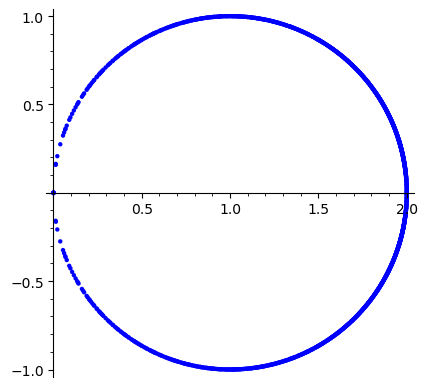

In [11]:
eigPlot(evs)

In [12]:
countZeros(evs)

1

In [13]:
errors(evs)

[1, 3.019806626980426e-14, 368, 2.2093438190040615e-14, 127]

In [14]:
sigma(evs, 0.1)

0.08280231593611694 + 5.631270694868078e-17*I 2.7782556634787088e-152 - 4.141145957500193e-166*I


- an attempt to repair eigenvalues, but it doesn't substantially change sigma

In [15]:
revs = repair(evs)

In [16]:
revs[:5]

[0.0,
 1.14657694908745e-15 + 5.605495226364665e-08*I,
 1.14657694908745e-15 - 5.605495226364665e-08*I,
 2.465664751528885e-07 + 0.0007022342133644065*I,
 2.465664751528885e-07 - 0.0007022342133644065*I]

In [17]:
revs[-5:]

[1.999979646845555 + 0.006380117133977955*I,
 1.999979646845555 - 0.006380117133977955*I,
 1.99999951207614 + 0.0009878499271085256*I,
 1.99999951207614 - 0.0009878499271085256*I,
 2.0]

In [22]:
sigma(revs, 0.001)

3.0424772442794286 1.231560817409353e-166 - 7.501581611343206e-182*I


In [23]:
sigma(evs, 0.001)

3.042477244277596 - 1.1404723270907022e-12*I 1.2315608174128186e-166 + 1.4592042590007435e-178*I


##### Configuration with no zero modes

In [20]:
evs = eigRead('/mnt/e/Jaime/b4_20x20Ov/Eig/L020x020_b04000i00011-HO.eig')
countZeros(evs)

0

In [21]:
evs[:6]

[0.0010686471567699 + 0.0462185277436985*I,
 0.00106864715676942 - 0.0462185277437*I,
 0.0105495575048314 + 0.144871742745497*I,
 0.0105495575048319 - 0.144871742745497*I,
 0.0167978292478168 + 0.182519838451048*I,
 0.0167978292478174 - 0.18251983845105*I]

In [22]:
sigma(evs, 0.1)

0.06336563771375628 + 2.2632991401178026e-17*I 3.79661898178735e-79 - 3.3163590793733125e-92*I


- adjusting normalization to get reasonable value for determinant

In [23]:
sigmaN(evs, 0.1, 0.5)

0.06336563771375628 + 2.2632991401178026e-17*I 3.79661898178735e-79 - 3.3163590793733125e-92*I


In [24]:
sigmaN(evs, 0.1, 0.6)

0.06336563771375628 + 2.2632991401178026e-17*I 8.402216210053148e-16 - 7.31949675364369e-29*I


In [25]:
sigmaN(evs, 0.1, 0.625)

0.06336563771375628 + 2.2632991401178026e-17*I 0.1280582082958871 - 1.1060813723262619e-14*I


In [26]:
sigmaN(evs, 0.5, 0.625)

0.10923888229601555 + 9.8917185206715e-18*I 464526068735.5922 - 0.04152488708496094*I


##### Configuration with many zero modes

In [51]:
evs = eigRead('/mnt/e/Jaime/b4_20x20Ov/Eig/L020x020_b04000i00006-HO.eig')
countZeros(evs)

4

In [52]:
evs[:6]

[5.78258277514479e-16 - 1.5147656666827e-15*I,
 1.88482896157554e-15 + 1.24343169018032e-15*I,
 3.71800131112136e-15 - 1.27233170360348e-15*I,
 5.01656206452631e-15 - 1.56969078381883e-16*I,
 0.0128117316344498 - 0.159559778144199*I,
 0.0128117316344499 + 0.1595597781442*I]

In [53]:
sigma(evs, 0.0001)

50.000039778083355 + 2.1257934409444424e-10*I 1.855511225033689e-92 - 3.15638990775118e-103*I


In [72]:
revs = repair(evs)

In [73]:
revs[:6]

[0.0,
 0.0,
 0.0,
 0.0,
 0.01281173163444985 + 0.1595597781441995*I,
 0.01281173163444985 - 0.1595597781441995*I]

In [74]:
revs[-6:]

[1.9999318714976249 + 0.0116727187599185*I,
 1.9999318714976249 - 0.0116727187599185*I,
 2.0,
 2.0,
 2.0,
 2.0]

In [75]:
sigma(revs, 0.001)

5.000397789961837 1.8558035387184147e-88 + 1.6045355224299515e-103*I


In [76]:
sigma(evs, 0.001)

5.000397789947839 + 2.1257942540190953e-12*I 1.8558035387392115e-88 - 3.165104923166747e-100*I


#### Maximal errors in complex conjugate pairs

In [39]:
errs = eigFiles('/mnt/e/Jaime/b4_20x20Ov/eigFiles.list')

5.0182080713057076e-14 8033 4.196643033083092e-14 8368


In [40]:
errs = eigFiles('/mnt/e/Jaime/b4_64x10Ov/eigFiles.list')

5.995204332975845e-14 9293 4.696243394164412e-14 7013


In [38]:
errs = eigFiles('/mnt/e/Jaime/b4_64x12Ov/eigFiles.list')

5.995204332975845e-14 6591 4.807265696626928e-14 6483


In [42]:
errs = eigFiles('/mnt/e/Jaime/b4_64x16Ov/eigFiles.list')

6.994405055138486e-14 2208 4.9960036108132044e-14 8959


#### WARNING: problem with .sort()

In [27]:
evs = eigRead('/mnt/e/Jaime/b4_64x12Ov/Eig/L064x012_b04000i09595-HO.eig')

In [28]:
evs.sort()

In [29]:
evs[:7]

[1.09796914774862e-15 - 5.60549515882476e-08*I,
 1.19518475042628e-15 + 5.60549529390457e-08*I,
 2.81504602466141e-15 + 5.17771643480482e-16*I,
 2.46566475122287e-07 - 0.000702234213364771*I,
 2.4656647518349e-07 + 0.000702234213364042*I,
 2.50170533193156e-06 + 0.00223682909580103*I,
 2.5017053319347e-06 - 0.00223682909580182*I]

In [30]:
evs.sort(key = abs)

In [31]:
evs[:7]

[2.81504602466141e-15 + 5.17771643480482e-16*I,
 1.09796914774862e-15 - 5.60549515882476e-08*I,
 1.19518475042628e-15 + 5.60549529390457e-08*I,
 2.4656647518349e-07 + 0.000702234213364042*I,
 2.46566475122287e-07 - 0.000702234213364771*I,
 2.50170533193156e-06 + 0.00223682909580103*I,
 2.5017053319347e-06 - 0.00223682909580182*I]

*Hip, 2022-08-17*

In [57]:
a = [i for i in range(10)]
for i in range(2):
    a[i] = 0
    a[10 - i - 1] = 2
for i in range(2, 10 - 2, 2):
    a[i] = (i + i + 1) / 2
    a[i + 1] = (i + i + 1) / 2
show(a)

[0, 0, 5/2, 5/2, 9/2, 9/2, 13/2, 13/2, 2, 2]